In [36]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_storage_path, EstimateQuantities1Run, AverageEstimates
# from geobin import EstimateQuantities1Run, AveragedEstimates

In [37]:
RUN_NUMBERS = np.arange(35, dtype=np.int64)
bad_runs = np.array([24,28,27])
run_numbers = np.setdiff1d(RUN_NUMBERS, bad_runs)

In [53]:
import matplotlib.pyplot as plt


def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=run_numbers, figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        # ax.set_aspect('equal')
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        # ax2.set_aspect('equal')
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    # plt.axis("equal")
    plt.show()


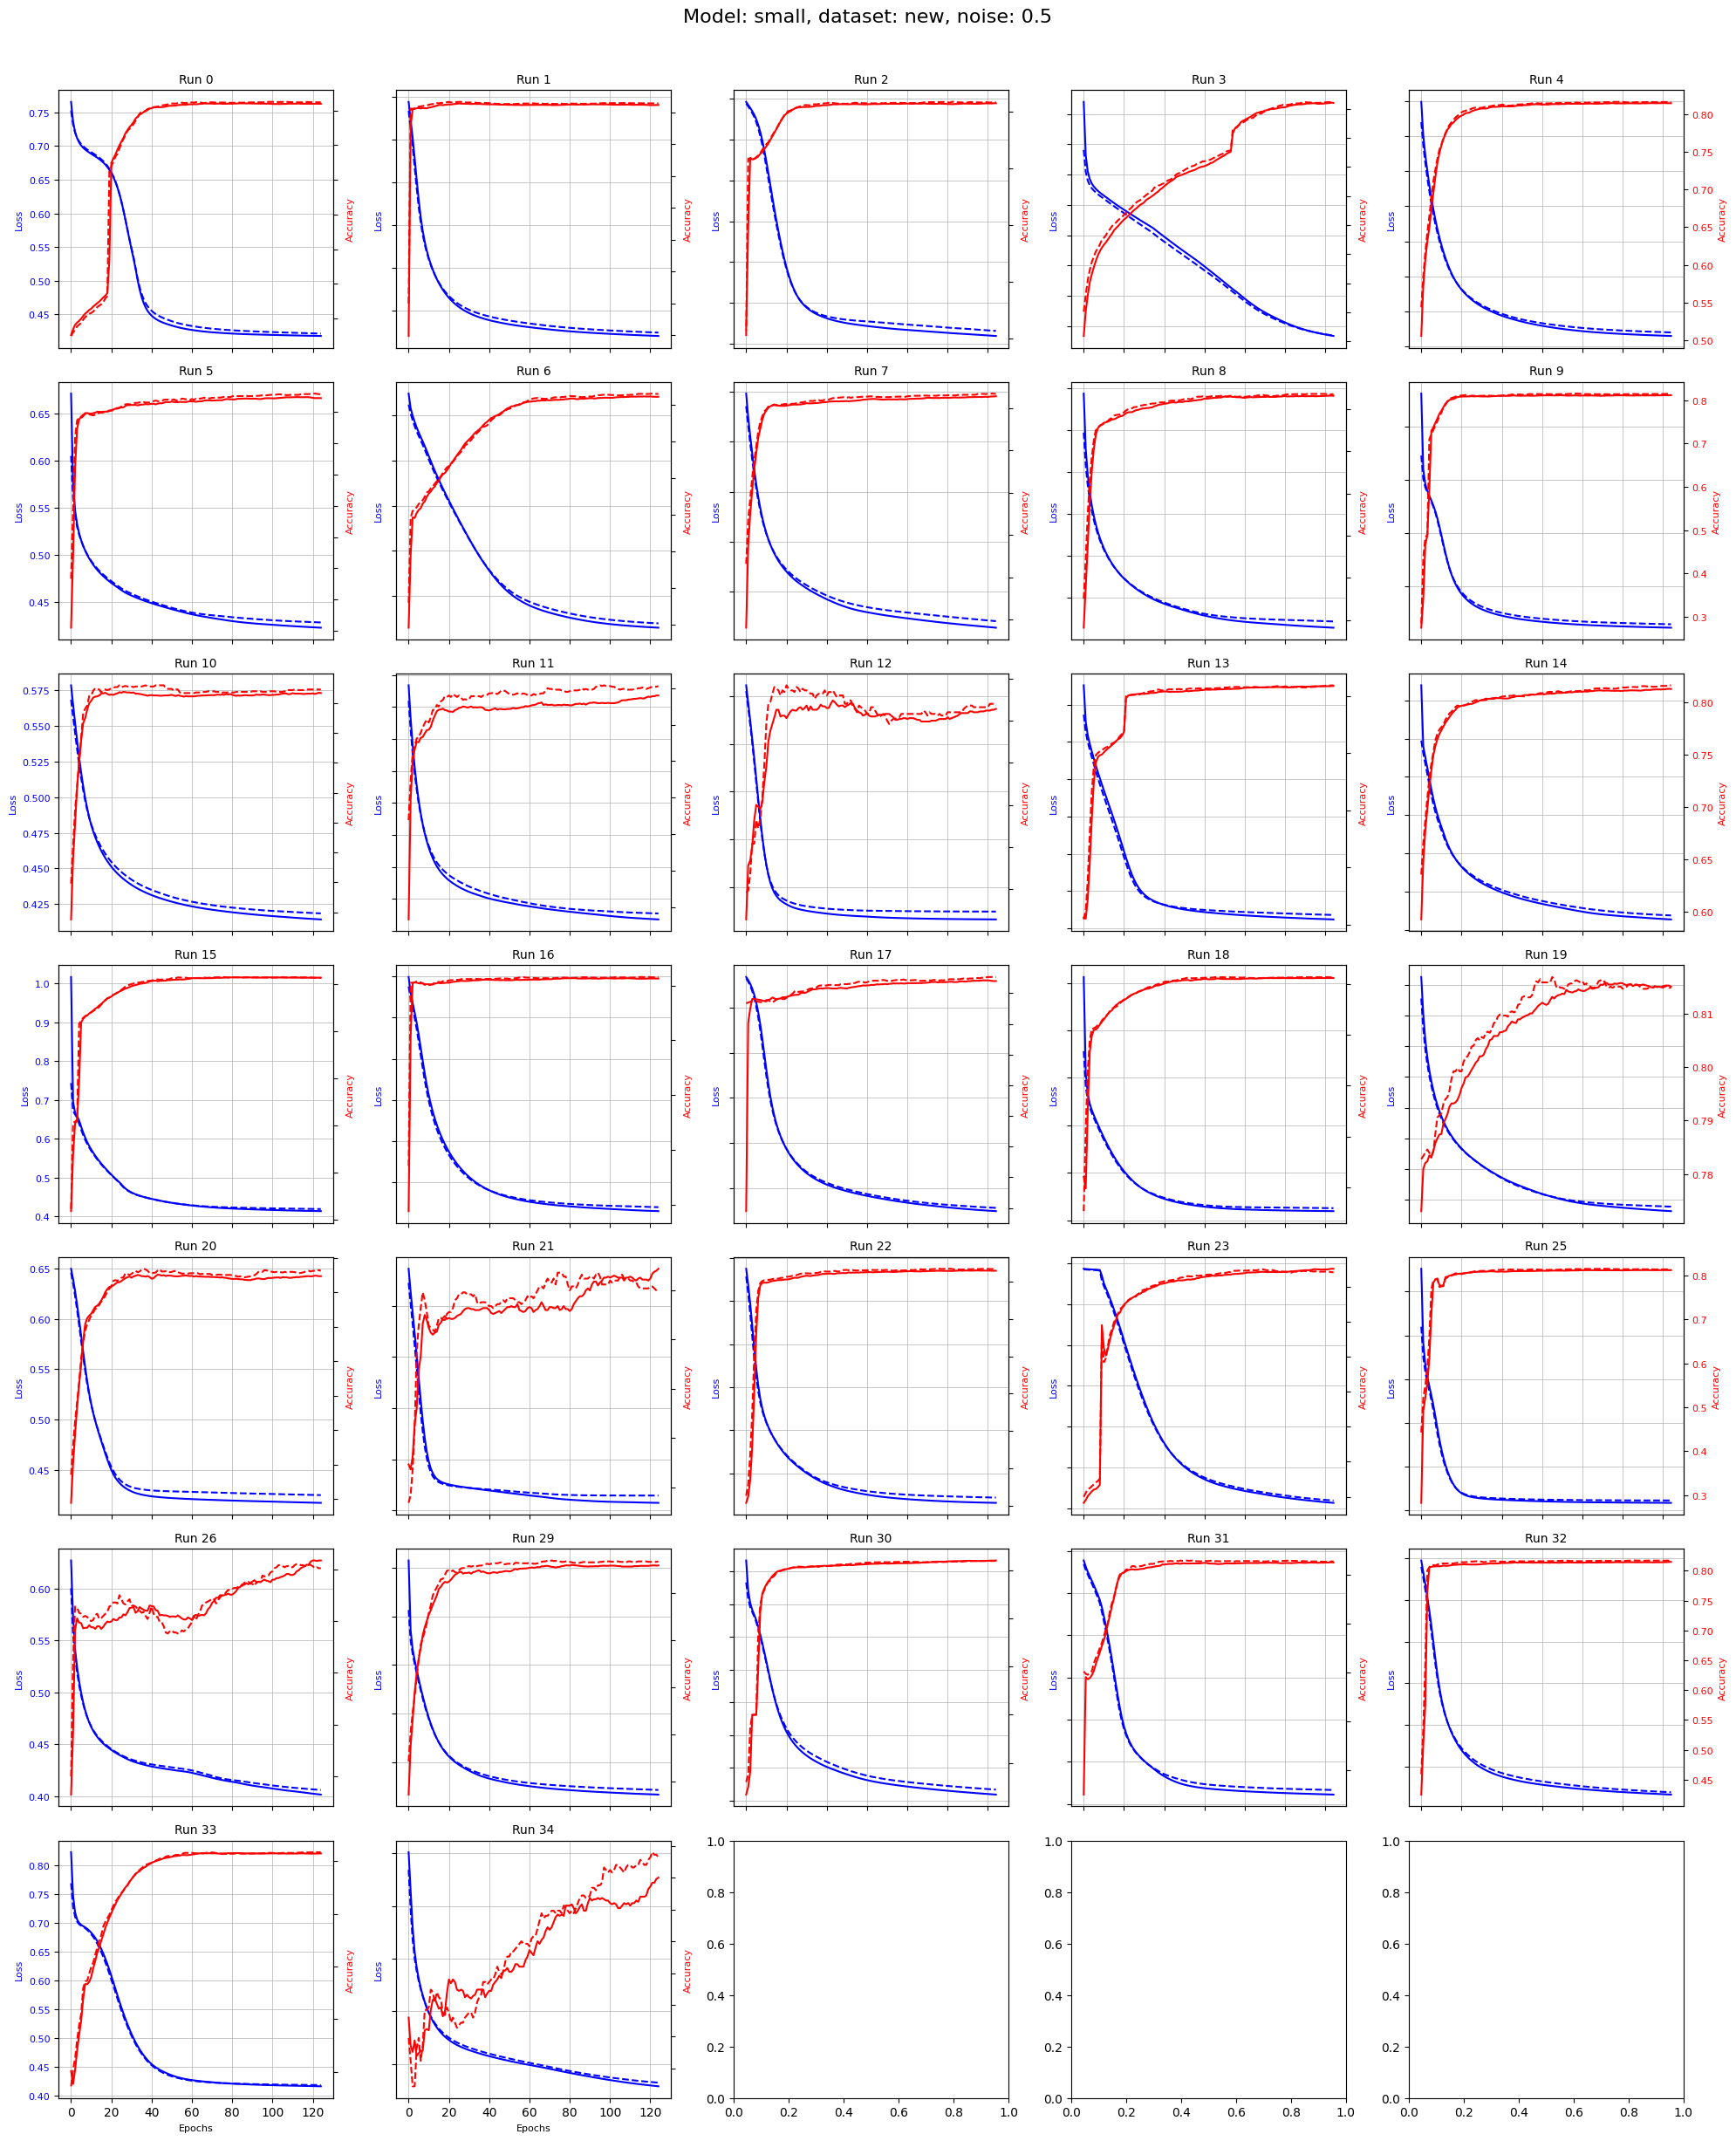

In [54]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.5)

In [55]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [56]:

first_run = EstimateQuantities1Run(get_storage_path("moons", model_name="small", dataset_name="new", noise_level=0.15, run_number=0))

In [42]:
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [43]:
# first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [44]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


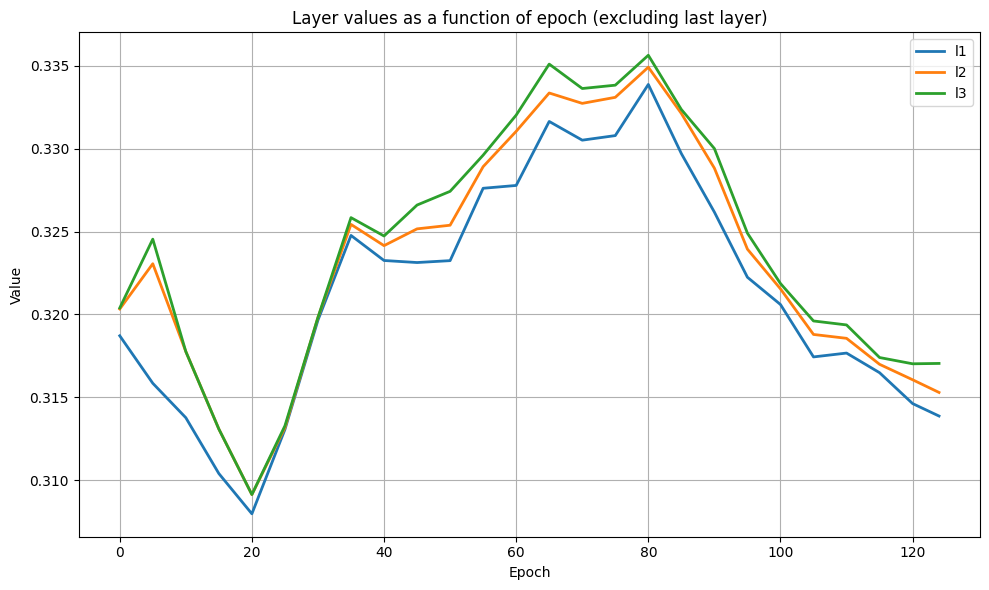

In [45]:
plot_layers_exclude_last(MI)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            data_dir=get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number))
        )
        # run.calculate_estimates()
        df = run.estimates["MI_KL"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


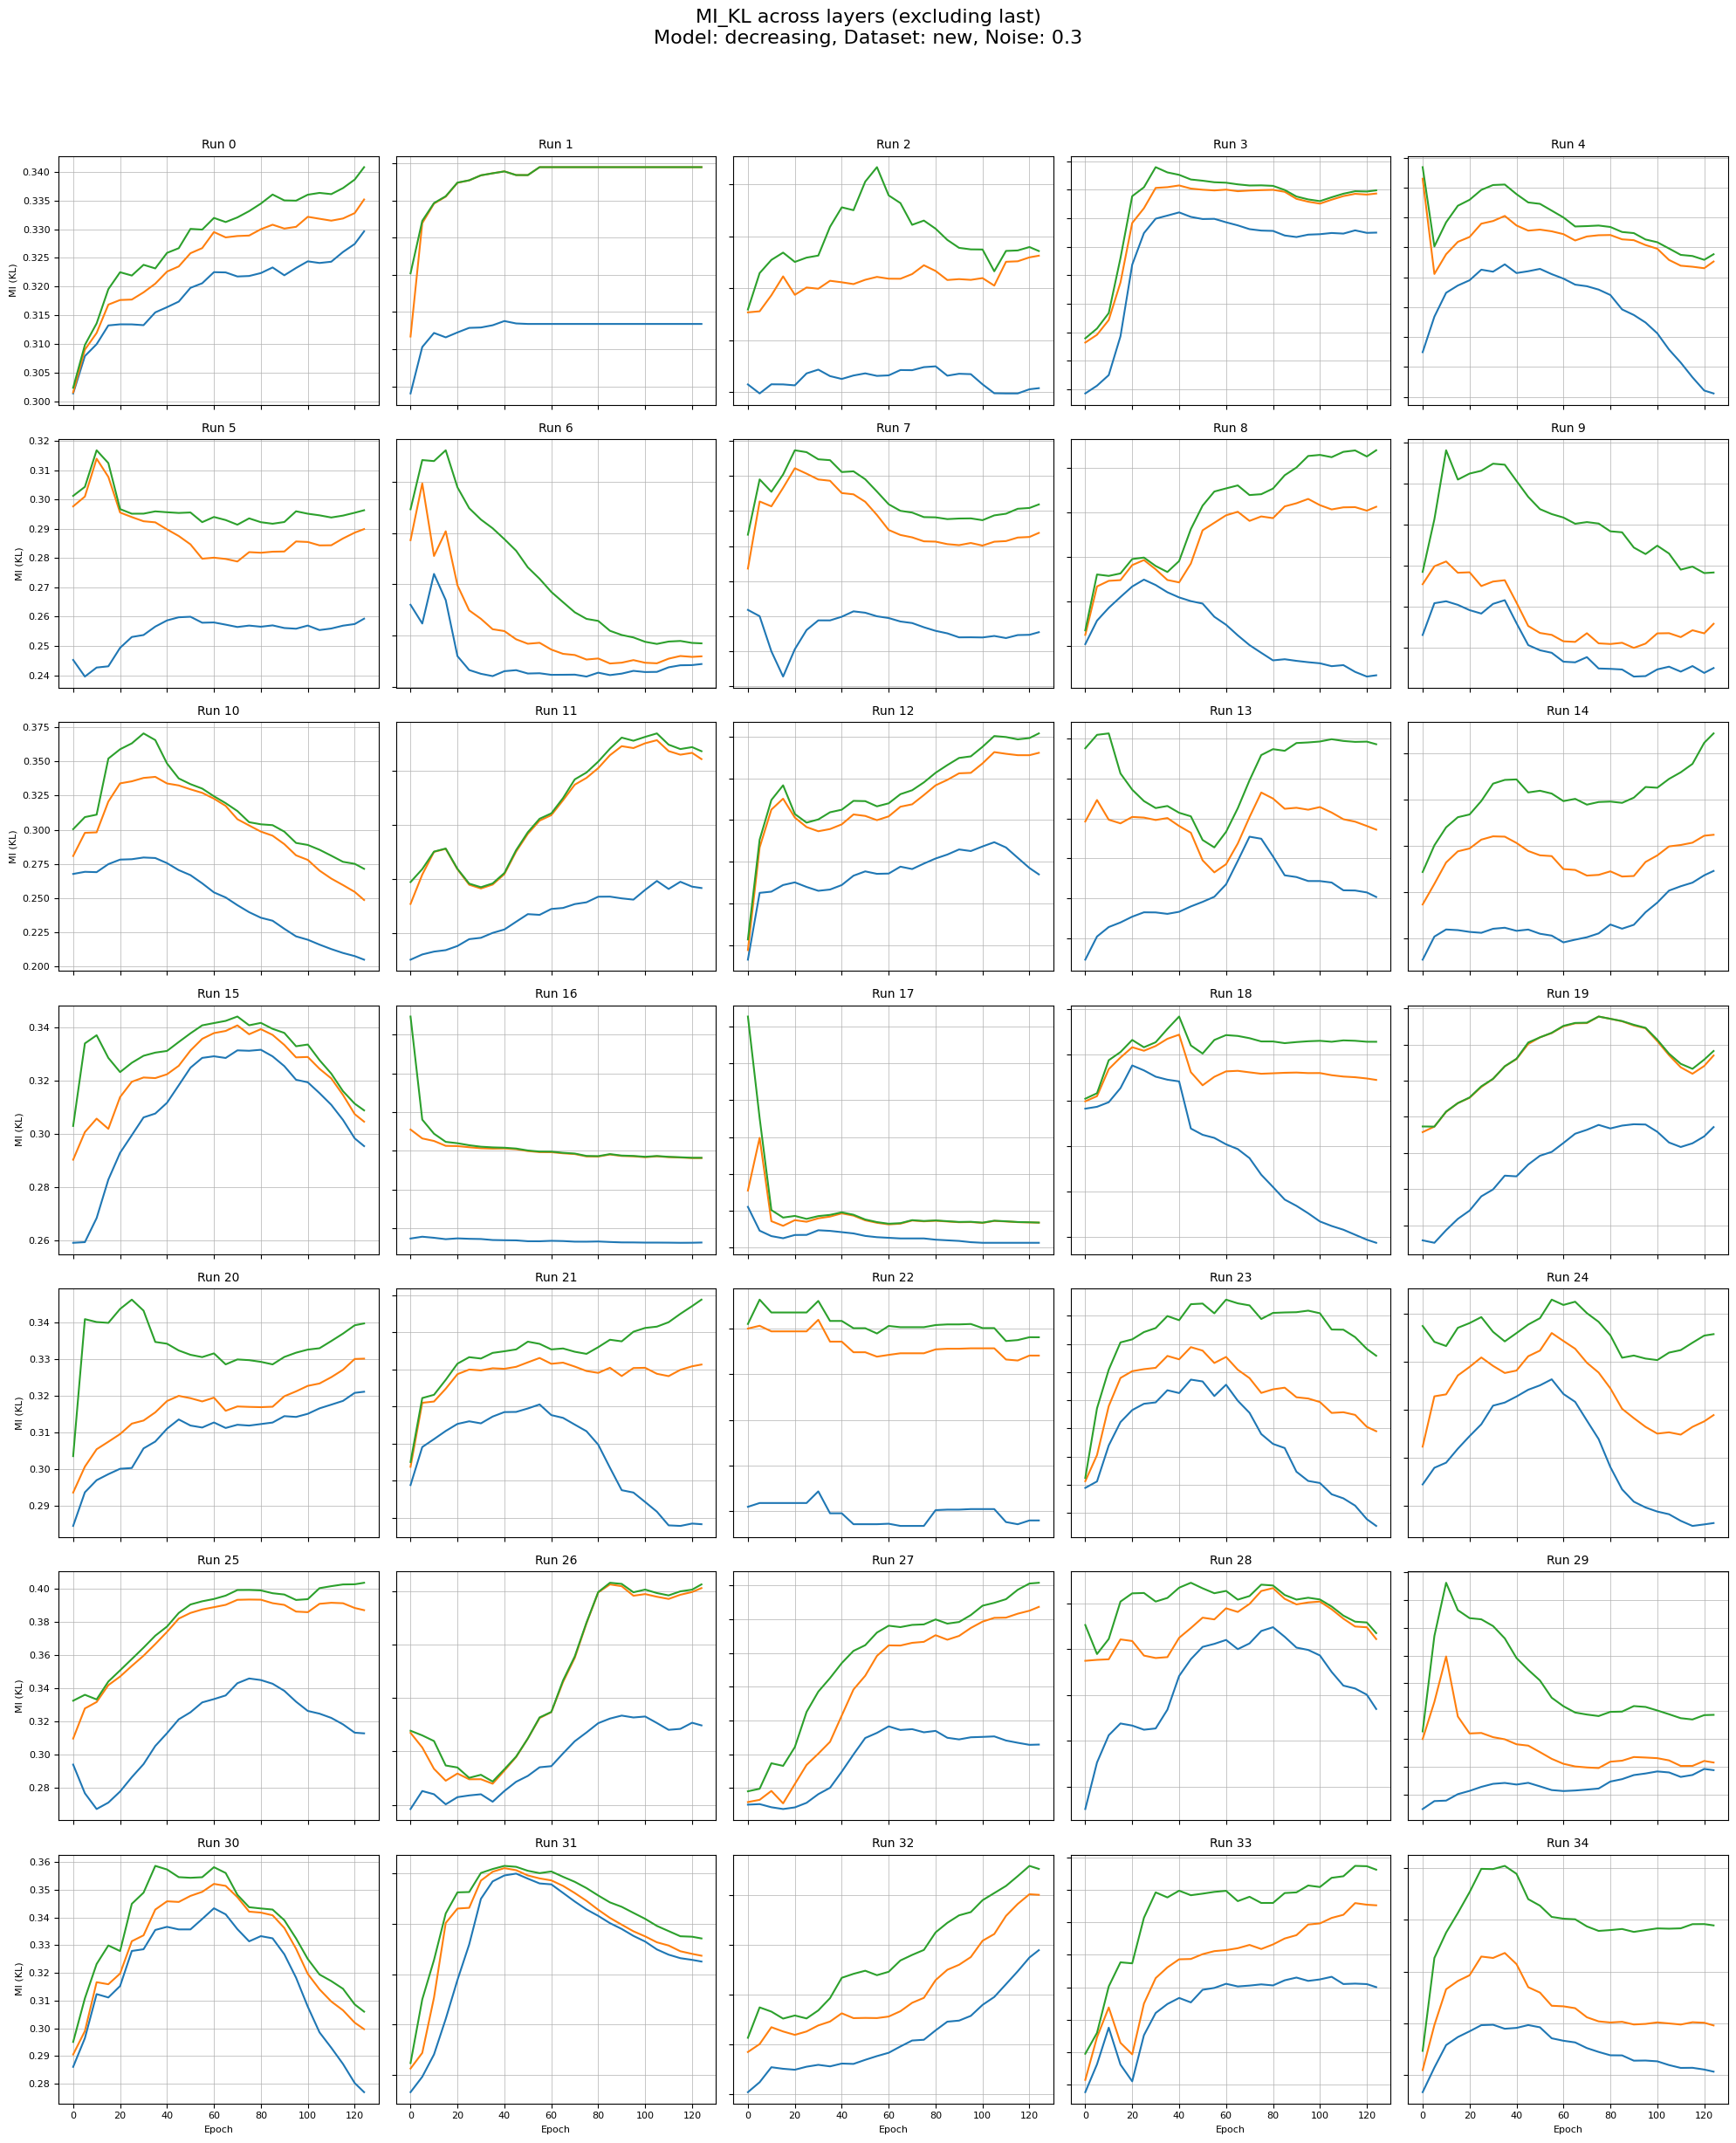

In [47]:
plot_multiple_runs_MI_layers_grid(
    model_name="decreasing",
    dataset_name="new",
    noise_level=0.3,
    run_numbers=np.arange(35)
)

In [48]:
from visualization import plot_both_KL_IS

In [49]:
run_test = EstimateQuantities1Run(
    data_dir=get_storage_path("moons", model_name="small", dataset_name="new", run_number=0, noise_level=0.15))

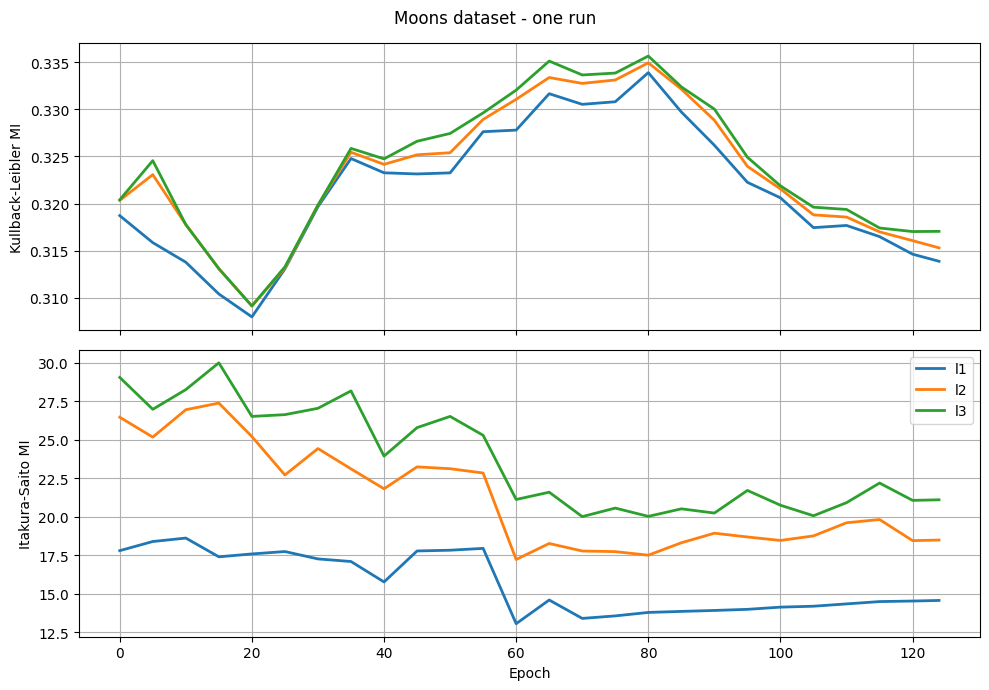

In [50]:
plot_both_KL_IS(run_test.get_estimates(), lw=2, super_title="Moons dataset - one run")

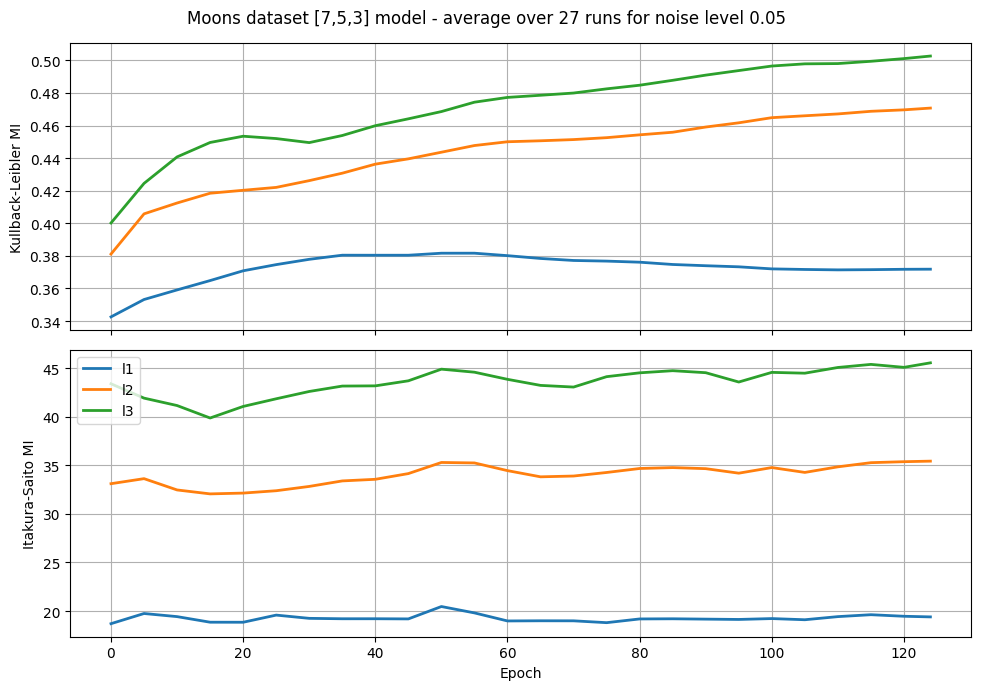

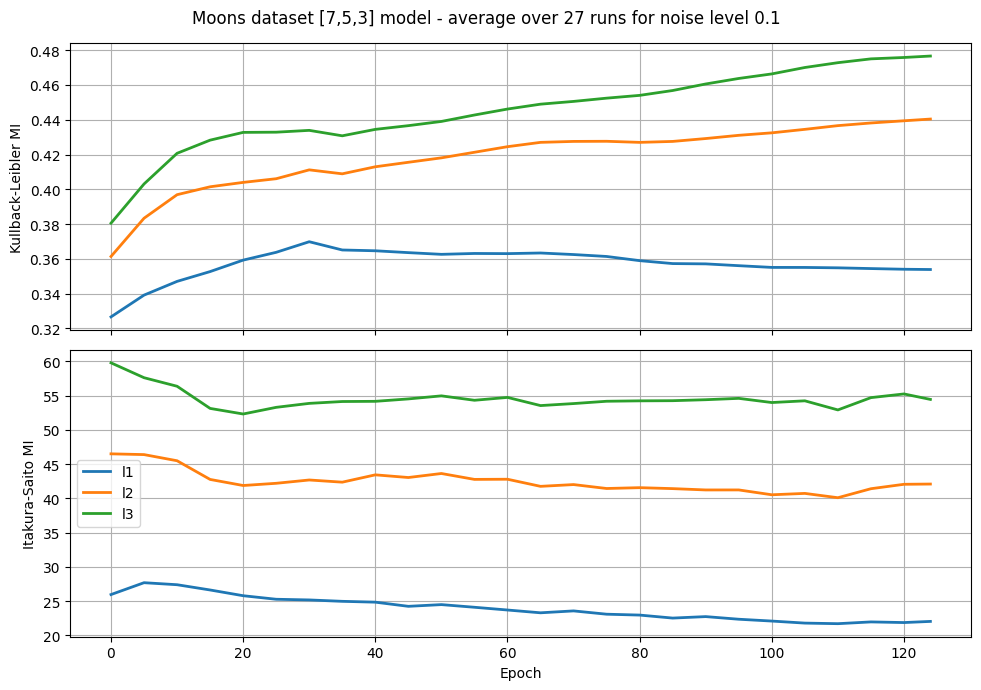

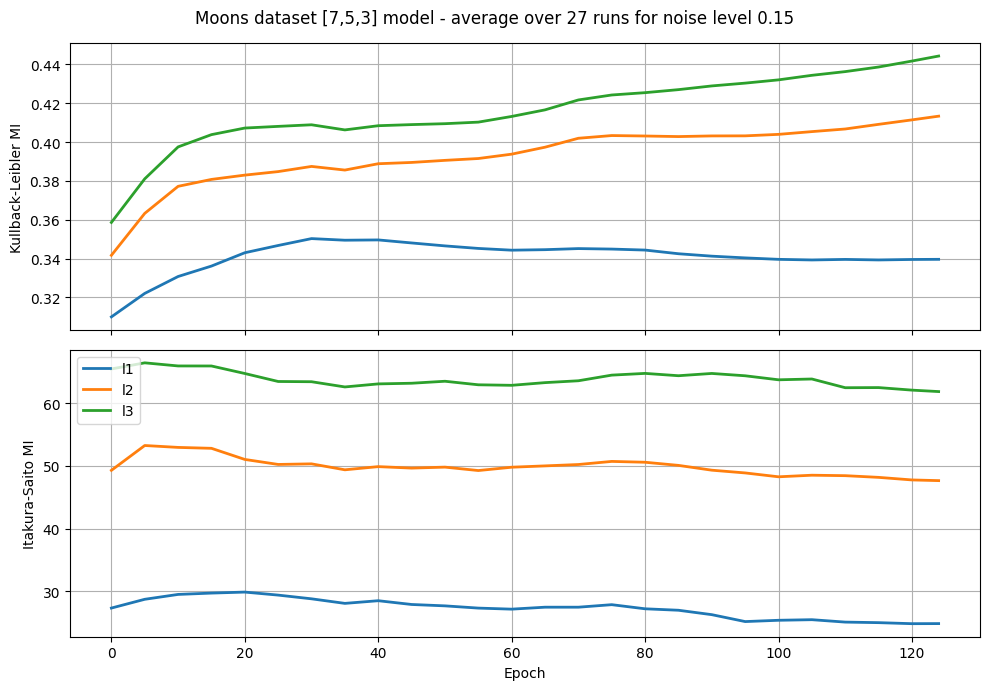

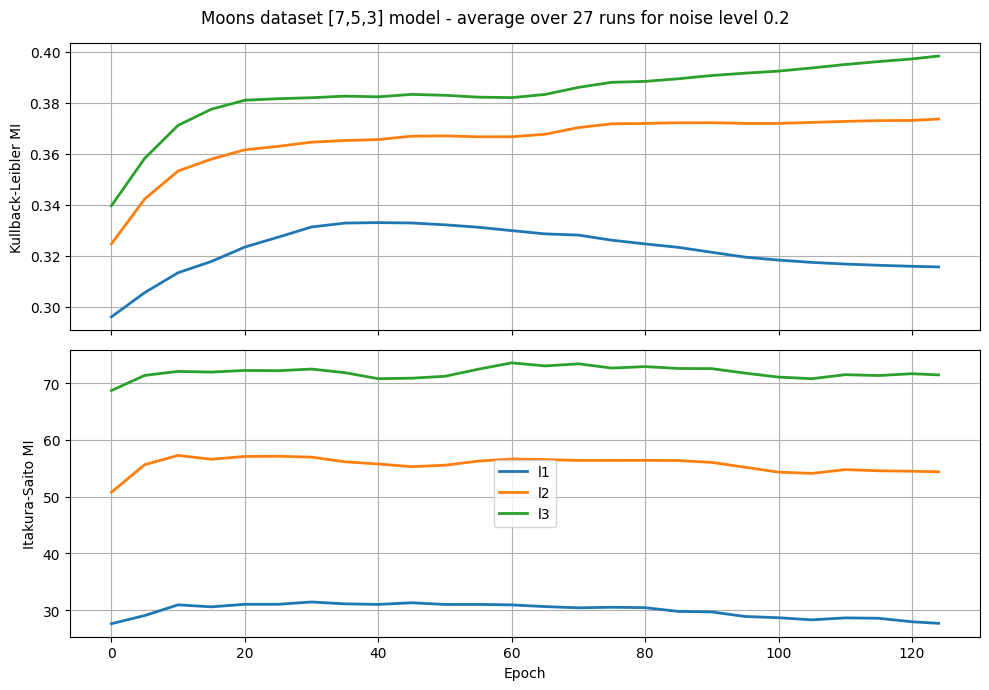

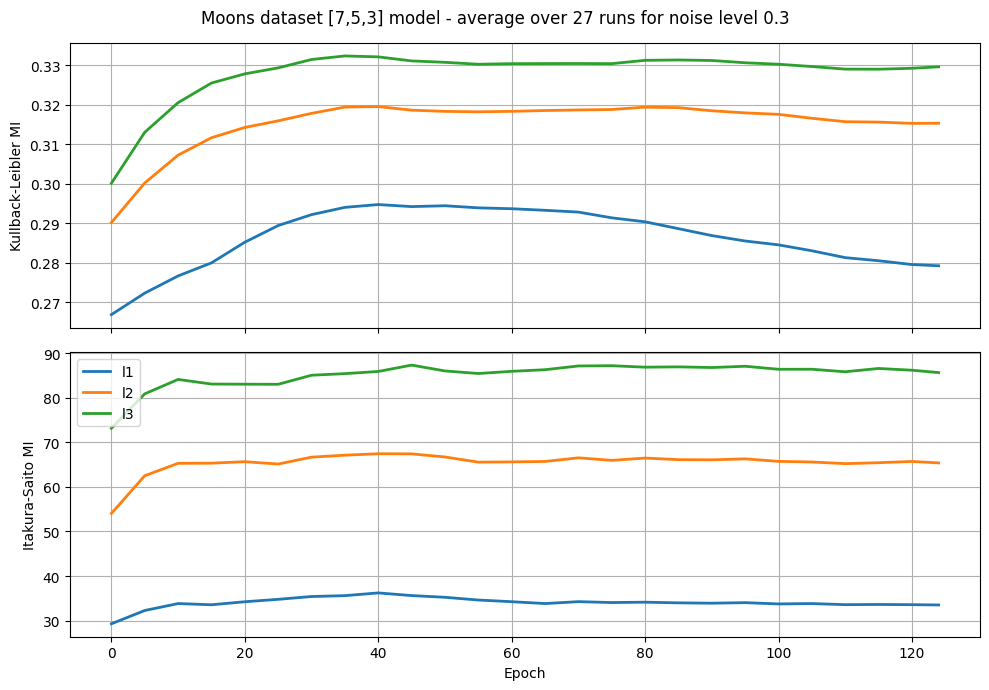

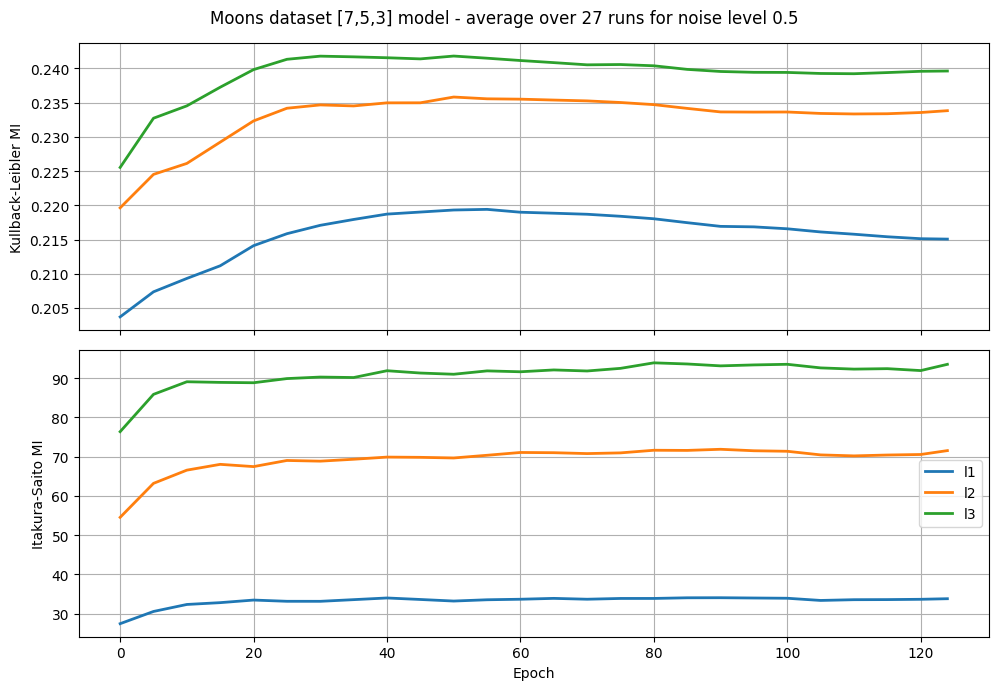

In [60]:
noise_levels = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
for noise_level in noise_levels:
    avg = AverageEstimates([get_storage_path("moons", model_name="decreasing", dataset_name="new", noise_level=noise_level, run_number=int(rn)) for rn in run_numbers])
    plot_both_KL_IS(avg.means, lw=2, super_title="Moons dataset [7,5,3] model - average over 27 runs for noise level {}".format(noise_level))